<a href="https://colab.research.google.com/github/Anas-art-source/AI_experiments/blob/main/PDF_data_extraction_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pdfquery PyPDF2 pymupdf easyocr pytesseract


# !pip install -Uqqq pip --progress-bar off
# !pip install -qqq torch==2.1 --progress-bar off
# !pip install -qqq transformers==4.34.1 --progress-bar off
# !pip install -qqq accelerate==0.23.0 --progress-bar off
# !pip install -qqq bitsandbytes==0.41.1 --progress-bar off
# !pip install -qqq llava-torch==1.1.1 --progress-bar off


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 30.9 MB/s eta 0:00:00
  Created wheel for pdfquery: filename=pdfquery-0.4.3-py3-none-any.whl size=16780 sha256=2f06fb2800cb9e2ebca3a2502a593ca682917011064cc274951856a5167701e0
  Stored in directory: /root/.cache/pip/wheels/98/a2/41/ca6652543d0fa5762560eaaf0f620a5d6341ec0b9e60996d16
Successfully built pdfquery


In [2]:
from pdfquery import PDFQuery

pdf = PDFQuery('/content/invoice.pdf.pdf')
pdf.load()
pdf.doc.catalog

FileNotFoundError: [Errno 2] No such file or directory: '/content/invoice.pdf.pdf'

In [ ]:
# x = pdf.pq(':contains("Invoicing templates")')
# print(x)

In [ ]:
from lxml import etree


tree = pdf.get_tree(0)

root =tree.getroot()
for element in root:
    # Do something with each element, for example:
    print(etree.tostring(element))

In [ ]:
data  = pdf.extract([
       ('with_formatter', 'text'),
      ('Company_first_name', ':in_bbox("59.528, 760.192, 157.475, 779.19")'),
      ('Company_second_name', ':in_bbox("59.528, 736.192, 281.884, 755.19")'),
      ('job_name', ':in_bbox("478.482, 770.151, 535.735, 782.151")'),
      ('invoice_number', ':in_bbox("461.221, 755.151, 538.8, 767.151")'),
      ('date', ':in_bbox("488.443, 740.151, 535.735, 752.151")'),
      ('to_name', ':in_bbox("59.528, 623.193, 139.794, 634.188")'),
      ('to_address_1', ':in_bbox("59.528, 603.822, 159.443, 615.822")'),
      ('to_address_2', ':in_bbox("59.528, 587.322, 159.884, 599.322")'),
      ('from_name', ':in_bbox("323.216, 623.193, 483.229, 634.188")'),
      ('from_address_1', ':in_bbox("323.216, 603.822, 423.132, 615.822")'),
      ('from_address_2', ':in_bbox("59.528, 587.322, 159.884, 599.322")'),
      ('sub_total', ':in_bbox("462.752, 304.918, 504.414, 315.913")'),
      ('tax', ':in_bbox("462.752, 289.918, 497.082, 300.913")'),
      ('total', ':in_bbox("462.752, 274.918, 502.952, 285.913")'),
      ('remainder', ':in_bbox("409.397, 229.868, 508.516, 240.863")'),
      ('total_pay_now', ':in_bbox(" 409.397, 229.868, 508.516, 240.863")'),

 ])

In [ ]:
from lxml import etree

# Assuming pdf.get_tree(0) returns the XML tree
tree = pdf.get_tree(0)

root = tree.getroot()

# Define an XPath expression to select LTTextBoxHorizontal elements
xpath_expr = ".//LTTextLineHorizontal"
i = 0

product_list = []
# Iterate over elements matching the XPath expression
for element in root.xpath(xpath_expr):
    # Extract text content of the element
    for el in element:
      i += 1
      if i >4:
        text_content = el.text
        product_list.append(text_content)


product_list = product_list[:-8]
dump = []
for idx in range(0,len(product_list)):
  if idx % 5 == 0:
    product_name = product_list[idx]
    product_quantity = product_list[idx+1]
    tax = product_list[idx+2]
    price = product_list[idx+3]
    subtotal = product_list[idx+4]
    dump.append({
        'product_name': product_name,
        'quantity': product_quantity,
        'tax': tax,
        "price": price,
        'subtotal': subtotal
        })


In [ ]:
data['product_list'] = dump

In [ ]:
data

{'Company_first_name': 'G I N Y A R D',
 'Company_second_name': 'I N T E R N A T I O N A L C O .',
 'job_name': 'Job Name',
 'invoice_number': 'Invoice 01234',
 'date': '3/05/22',
 'to_name': 'J u l i a n a S i l v a J u l i a n a S i l v a',
 'to_address_1': '123 Anywhere St.,',
 'to_address_2': 'Any City, ST 12345',
 'from_name': 'G i n y a r d I n t e r n a t i o n a l C o . G i n y a r d I n t e r n a t i o n a l C o .',
 'from_address_1': '123 Anywhere St.,',
 'from_address_2': 'Any City, ST 12345',
 'sub_total': '$300.00',
 'tax': '$45.00',
 'total': '$345.00',
 'remainder': '$345.00 PAY N OW $345.00 PAY N OW',
 'total_pay_now': '$345.00 PAY N OW $345.00 PAY N OW',
 'product_list': [{'product_name': 'Design ',
   'quantity': '1 ',
   'tax': '15% ',
   'price': '$100.00 ',
   'subtotal': '$115.00 '},
  {'product_name': 'Artwork ',
   'quantity': '1 ',
   'tax': '15% ',
   'price': '$100 ',
   'subtotal': '$115.00 '},
  {'product_name': 'Social Media ',
   'quantity': '1 ',
   'tax

In [ ]:
def extract_pdf(filename: str):
  pdf = PDFQuery(filename)
  pdf.load()
  data  = pdf.extract([
       ('with_formatter', 'text'),
      ('Company_first_name', ':in_bbox("59.528, 760.192, 157.475, 779.19")'),
      ('Company_second_name', ':in_bbox("59.528, 736.192, 281.884, 755.19")'),
      ('job_name', ':in_bbox("478.482, 770.151, 535.735, 782.151")'),
      ('invoice_number', ':in_bbox("461.221, 755.151, 538.8, 767.151")'),
      ('date', ':in_bbox("488.443, 740.151, 535.735, 752.151")'),
      ('to_name', ':in_bbox("59.528, 623.193, 139.794, 634.188")'),
      ('to_address_1', ':in_bbox("59.528, 603.822, 159.443, 615.822")'),
      ('to_address_2', ':in_bbox("59.528, 587.322, 159.884, 599.322")'),
      ('from_name', ':in_bbox("323.216, 623.193, 483.229, 634.188")'),
      ('from_address_1', ':in_bbox("323.216, 603.822, 423.132, 615.822")'),
      ('from_address_2', ':in_bbox("59.528, 587.322, 159.884, 599.322")'),
      ('sub_total', ':in_bbox("462.752, 304.918, 504.414, 315.913")'),
      ('tax', ':in_bbox("462.752, 289.918, 497.082, 300.913")'),
      ('total', ':in_bbox("462.752, 274.918, 502.952, 285.913")'),
      ('remainder', ':in_bbox("409.397, 229.868, 508.516, 240.863")'),
      ('total_pay_now', ':in_bbox(" 409.397, 229.868, 508.516, 240.863")'), ])


  tree = pdf.get_tree(0)
  root = tree.getroot()

  # Define an XPath expression to select LTTextBoxHorizontal elements
  xpath_expr = ".//LTTextLineHorizontal"
  i = 0

  product_list = []
  # Iterate over elements matching the XPath expression
  for element in root.xpath(xpath_expr):
      #Extract text content of the element
      for el in element:
        i += 1
        if i >4:
          text_content = el.text
          product_list.append(text_content)


  product_list = product_list[:-8]
  dump = []
  for idx in range(0,len(product_list)):
    if idx % 5 == 0:
      product_name = product_list[idx]
      product_quantity = product_list[idx+1]
      tax = product_list[idx+2]
      price = product_list[idx+3]
      subtotal = product_list[idx+4]
      dump.append({
            'product_name': product_name,
            'quantity': product_quantity,
            'tax': tax,
            "price": price,
            'subtotal': subtotal
            })


  data['product_list'] = dump

  return data

In [ ]:
extract_pdf('/content/invoice.pdf.pdf')

{'Company_first_name': 'G I N Y A R D',
 'Company_second_name': 'I N T E R N A T I O N A L C O .',
 'job_name': 'Job Name',
 'invoice_number': 'Invoice 01234',
 'date': '3/05/22',
 'to_name': 'J u l i a n a S i l v a J u l i a n a S i l v a',
 'to_address_1': '123 Anywhere St.,',
 'to_address_2': 'Any City, ST 12345',
 'from_name': 'G i n y a r d I n t e r n a t i o n a l C o . G i n y a r d I n t e r n a t i o n a l C o .',
 'from_address_1': '123 Anywhere St.,',
 'from_address_2': 'Any City, ST 12345',
 'sub_total': '$300.00',
 'tax': '$45.00',
 'total': '$345.00',
 'remainder': '$345.00 PAY N OW $345.00 PAY N OW',
 'total_pay_now': '$345.00 PAY N OW $345.00 PAY N OW',
 'product_list': [{'product_name': 'Design ',
   'quantity': '1 ',
   'tax': '15% ',
   'price': '$100.00 ',
   'subtotal': '$115.00 '},
  {'product_name': 'Artwork ',
   'quantity': '1 ',
   'tax': '15% ',
   'price': '$100 ',
   'subtotal': '$115.00 '},
  {'product_name': 'Social Media ',
   'quantity': '1 ',
   'tax

In [ ]:
from pdfquery import PDFQuery

pdf = PDFQuery('/content/judgement_2.pdf')
pdf.load()
pdf.doc.catalog

{'Pages': <PDFObjRef:2>, 'Type': /'Catalog'}

In [ ]:
from lxml import etree


tree = pdf.get_tree(0)

root =tree.getroot()
for element in root:
    # Do something with each element, for example:
    print(etree.tostring(element))

b'<LTPage y0="0" y1="841.92" x0="0" x1="595.32" width="595.32" height="841.92" bbox="[0, 0, 595.32, 841.92]" pageid="31" rotate="0" page_index="0" page_label=""><LTTextLineHorizontal y0="788.508" y1="800.508" x0="385.32" x1="520.771" width="135.451" height="12.0" bbox="[385.32, 788.508, 520.771, 800.508]" word_margin="0.1"><LTTextBoxHorizontal y0="788.508" y1="800.508" x0="385.32" x1="520.771" width="135.451" height="12.0" bbox="[385.32, 788.508, 520.771, 800.508]" index="0">Case No: 3312598/2022 </LTTextBoxHorizontal></LTTextLineHorizontal><LTTextLineHorizontal y0="685.896" y1="709.897" x0="143.88" x1="465.148" width="321.268" height="24.001" bbox="[143.88, 685.896, 465.148, 709.897]" word_margin="0.1"><LTTextBoxHorizontal y0="685.896" y1="709.897" x0="143.88" x1="465.148" width="321.268" height="24.001" bbox="[143.88, 685.896, 465.148, 709.897]" index="1">EMPLOYMENT TRIBUNALS </LTTextBoxHorizontal></LTTextLineHorizontal><LTTextLineHorizontal y0="645.708" y1="657.708" x0="93.746" x1="

In [ ]:
# Assuming pdf.get_tree(0) returns the XML tree
tree = pdf.get_tree(0)

root = tree.getroot()

# Define an XPath expression to select LTTextBoxHorizontal elements
xpath_expr = ".//LTTextBoxHorizontal"

# Iterate over elements matching the XPath expression
for element in root.xpath(xpath_expr):
    # Extract text content of the element
    text_content = element.text

    # Print or process the text content as needed
    print(text_content)

Case No: 3312598/2022 
EMPLOYMENT TRIBUNALS 
laimant: 
 Mark Sturgess 
espondent: Cambridge Country Club Ltd 
eard at: 
 Watford by video 
 On: 9 & 10 November 2023 
efore: 
 Employment Judge K Hunt 
epresentation 

 Miss Webber 
RESERVED JUDGMENT 
1. 
The complaint of unfair dismissal is well-founded. The claimant was 
unfairly dismissed. 
2. 

3. 

4. 
The complaint of wrongful dismissal in breach of contract in relation to 
notice pay is well-founded. 
5. 

6. 

REASONS 
10.5 Reserved judgment with reasons – rule 62 
March 2017 


In [ ]:
pdf.extract([
      ('with_formatter', 'text'),
      ('year', 'LTTextLineHorizontal:contains("£434.75")', lambda match: match.text())
 ])

{'year': ''}

In [ ]:
import PyPDF2
# Open the PDF file
t = ''
with open('/content/judgement_2.pdf', 'rb') as file:
    # Create a PDF reader object
    reader = PyPDF2.PdfReader(file)
    # Iterate over each page in the PDF
    for page_num in range(len(reader.pages)):
        # Get the current page
        page = reader.pages[page_num]

        # Extract text from the page
        text = page.extract_text()

        # Split the text into lines
        lines = text.split('\n')

        # Iterate over each line in the page
        for line in lines:
            # Print or process the line as needed
            t =  t + line +'\n'
            # print(text)
            # print(line)

t

'Case No: 3312598/2022 \n10.5 Reserved judgment with reasons – rule 62  March 2017 \n \n \nEMPLOYMENT TRIBUNALS \n \n \nClaimant:   Mark Sturgess \n \nRespondent:  Cambridge Country Club Ltd  \n \n \nHeard at:    Watford by video     On: 9 & 10 November 2023   \n \nBefore:    Employment Judge K Hunt    \n \nRepresentation \nClaimant:    Miss Webber   \nRespondent:   Mr Hine   \n \n \nRESERVED JUDGMENT \n1. The complaint of unfair dismissal is well-founded. The claimant was \nunfairly dismissed. \n \n2. The respondent unreasonably failed to comply with the ACAS Code of \nPractice on Disciplinary and Grievance Procedures 2015 and it is just and \nequitable to increase the compensatory award payable to the claimant by \n20% in accordance with s 207A Trade Union & Labour Relations \n(Consolidation) Act 1992 \n \n3. The claimant caused or contributed to the dismissal by blameworthy \nconduct and it is just and equitable to reduce the basic and compensatory \naward payable to the claimant by

In [ ]:
print(t)

Case No: 3312598/2022 
10.5 Reserved judgment with reasons – rule 62  March 2017 
 
 
EMPLOYMENT TRIBUNALS 
 
 
Claimant:   Mark Sturgess 
 
Respondent:  Cambridge Country Club Ltd  
 
 
Heard at:    Watford by video     On: 9 & 10 November 2023   
 
Before:    Employment Judge K Hunt    
 
Representation 
Claimant:    Miss Webber   
Respondent:   Mr Hine   
 
 
RESERVED JUDGMENT 
1. The complaint of unfair dismissal is well-founded. The claimant was 
unfairly dismissed. 
 
2. The respondent unreasonably failed to comply with the ACAS Code of 
Practice on Disciplinary and Grievance Procedures 2015 and it is just and 
equitable to increase the compensatory award payable to the claimant by 
20% in accordance with s 207A Trade Union & Labour Relations 
(Consolidation) Act 1992 
 
3. The claimant caused or contributed to the dismissal by blameworthy 
conduct and it is just and equitable to reduce the basic and compensatory 
award payable to the claimant by 40%. 
 
4. The complaint of wrong

In [3]:
from pdfquery import PDFQuery

pdf = PDFQuery('/content/SOF_MV LILA SEOUL SOF_667916 (1).pdf')
pdf.load()
pdf.doc.catalog

{'Type': /'Catalog', 'Pages': <PDFObjRef:12>}

In [4]:
from lxml import etree


tree = pdf.get_tree(0)

root =tree.getroot()
for element in root:
    # Do something with each element, for example:
    print(etree.tostring(element))

b'<LTPage y0="0" y1="841" x0="0" x1="595" width="595" height="841" bbox="[0, 0, 595, 841]" pageid="4" rotate="0" page_index="0" page_label=""><LTImage y0="0" y1="841" x0="0" x1="595" width="595" height="841" bbox="[0, 0, 595, 841]" name="lm1" colorspace="[&quot;/DeviceRGB&quot;]" bits="8" imagemask="null" srcsize="[1240, 1753]" stream="&lt;PDFStream(3): raw=1182651, {\'Type\': /\'XObject\', \'Subtype\': /\'Image\', \'Length\': 1182651, \'Filter\': /\'FlateDecode\', \'ColorSpace\': /\'DeviceRGB\', \'BitsPerComponent\': 8, \'Width\': 1240, \'Height\': 1753}&gt;"><LTFigure y0="0" y1="841" x0="0" x1="595" width="595" height="841" bbox="[0, 0, 595, 841]" name="lm1" matrix="[595, 0, 0, 841, 0, 0]"/></LTImage></LTPage>'


In [5]:
# Assuming pdf.get_tree(0) returns the XML tree
tree = pdf.get_tree(0)

root = tree.getroot()

# Define an XPath expression to select LTTextBoxHorizontal elements
xpath_expr = ".//LTTextBoxHorizontal"

# Iterate over elements matching the XPath expression
for element in root.xpath(xpath_expr):
    # Extract text content of the element
    text_content = element.text

    # Print or process the text content as needed
    print(text_content)

In [7]:
from lxml import etree
import fitz

def display_element_info(element):
    if element.tag == "LTImage":
        image_info = element.attrib
        print("Image:")
        print(image_info)
    else:
        print(etree.tostring(element))

def extract_images_from_pdf(pdf_file):
    pdf_document = fitz.open(pdf_file)
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        for image in page.get_images(full=True):
            yield image[0]

tree = pdf.get_tree(0)
root = tree.getroot()

for element in root:
    display_element_info(element)

pdf_file = "/content/SOF_MV LILA SEOUL SOF_667916 (1).pdf"
for image in extract_images_from_pdf(pdf_file):
    print("Image:", image)

b'<LTPage y0="0" y1="841" x0="0" x1="595" width="595" height="841" bbox="[0, 0, 595, 841]" pageid="7" rotate="0" page_index="0" page_label=""><LTImage y0="0" y1="841" x0="0" x1="595" width="595" height="841" bbox="[0, 0, 595, 841]" name="lm1" colorspace="[&quot;/DeviceRGB&quot;]" bits="8" imagemask="null" srcsize="[1240, 1753]" stream="&lt;PDFStream(3): raw=1182651, {\'Type\': /\'XObject\', \'Subtype\': /\'Image\', \'Length\': 1182651, \'Filter\': /\'FlateDecode\', \'ColorSpace\': /\'DeviceRGB\', \'BitsPerComponent\': 8, \'Width\': 1240, \'Height\': 1753}&gt;"><LTFigure y0="0" y1="841" x0="0" x1="595" width="595" height="841" bbox="[0, 0, 595, 841]" name="lm1" matrix="[595, 0, 0, 841, 0, 0]"/></LTImage></LTPage>'
Image: 3
Image: 6
Image: 9
Image: 3
Image: 6
Image: 9
Image: 3
Image: 6
Image: 9


In [8]:
import fitz  # PyMuPDF
import os

def extract_images_from_pdf(pdf_file):
    pdf_document = fitz.open(pdf_file)
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        for index, img in enumerate(page.get_images(full=True)):
            image_bytes = pdf_document.extract_image(img[0])
            image_name = f"page{page_num+1}_image{index}.png"
            with open(image_name, "wb") as f:
                f.write(image_bytes["image"])

pdf_file = "/content/SOF_MV LILA SEOUL SOF_667916 (1).pdf"
extract_images_from_pdf(pdf_file)


In [ ]:
import textwrap
from io import BytesIO

import requests
import torch
from llava.constants import DEFAULT_IMAGE_TOKEN, IMAGE_TOKEN_INDEX
from llava.conversation import SeparatorStyle, conv_templates
from llava.mm_utils import (
    KeywordsStoppingCriteria,
    get_model_name_from_path,
    process_images,
    tokenizer_image_token,
)
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from PIL import Image

[2024-02-17 20:09:34,385] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:
disable_torch_init()


In [ ]:

MODEL = "4bit/llava-v1.5-13b-3GB"
model_name = get_model_name_from_path(MODEL)
model_name

'llava-v1.5-13b-3GB'

In [ ]:

tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=MODEL, model_base=None, model_name=model_name, load_4bit=True
)

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
def load_image(image_file):
    if image_file.startswith("http://") or image_file.startswith("https://"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image

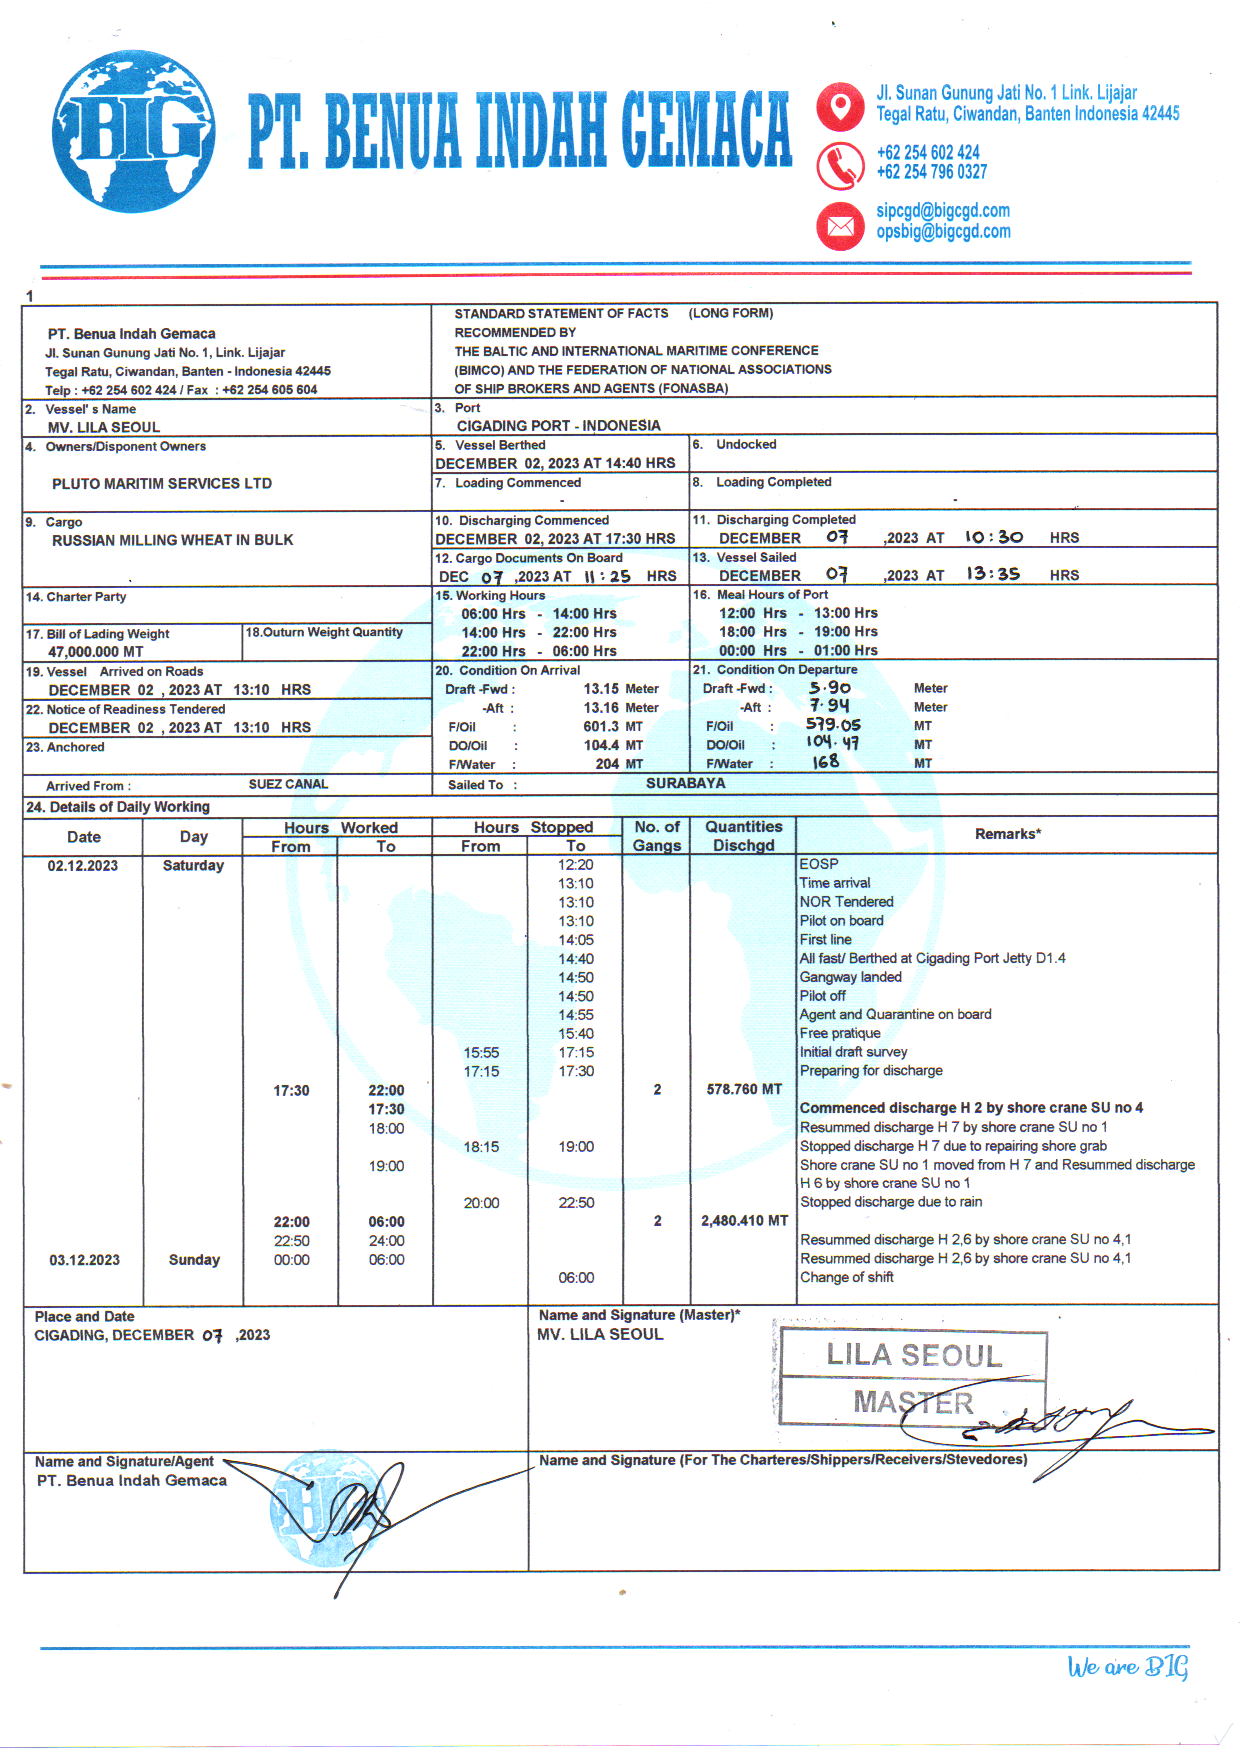

In [ ]:

image = load_image("/content/page1_image0.png")
image

In [ ]:

def process_image(image):
    args = {"image_aspect_ratio": "pad"}
    image_tensor = process_images([image], image_processor, args)
    return image_tensor.to(model.device, dtype=torch.float16)

In [ ]:

processed_image = process_image(image)
type(processed_image), processed_image.shape

(torch.Tensor, torch.Size([1, 3, 336, 336]))

In [ ]:
CONV_MODE = "llava_v0"


In [ ]:

def create_prompt(prompt: str):
    conv = conv_templates[CONV_MODE].copy()
    roles = conv.roles
    prompt = DEFAULT_IMAGE_TOKEN + "\n" + prompt
    conv.append_message(roles[0], prompt)
    conv.append_message(roles[1], None)
    return conv.get_prompt(), conv

In [ ]:

prompt, _ = create_prompt("Describe the image")
print(prompt)

A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.###Human: <image>
Describe the image###Assistant:


In [ ]:
def ask_image(image: Image, prompt: str):
    image_tensor = process_image(image)
    prompt, conv = create_prompt(prompt)
    input_ids = (
        tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
        .unsqueeze(0)
        .to(model.device)
    )

    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    stopping_criteria = KeywordsStoppingCriteria(
        keywords=[stop_str], tokenizer=tokenizer, input_ids=input_ids
    )

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=image_tensor,
            do_sample=True,
            temperature=0.001,
            max_new_tokens=512,
            use_cache=True,
            stopping_criteria=[stopping_criteria],
        )
    return tokenizer.decode(
        output_ids[0, input_ids.shape[1] :], skip_special_tokens=True
    ).strip()

In [ ]:
%%time
result = ask_image(image, "you are given the image of table. Where did the ship arrived from?")
print(textwrap.fill(result, width=110))

The ship arrived from Indonesia.
CPU times: user 1.73 s, sys: 448 ms, total: 2.17 s
Wall time: 2.17 s


In [ ]:
!pip install easyocr

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [9]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# read image
image_path = '/content/page1_image0.png'

img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25

data = []
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)
    data.append(t)



Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete([[872, 79], [1048, 79], [1048, 106], [872, 106]], 'JI; Sunan Gunung Jati No;', 0.38325067105496746)
([[1058, 80], [1142, 80], [1142, 106], [1058, 106]], 'Link; Lijajar', 0.9844379095200665)
([[912, 100], [1184, 100], [1184, 126], [912, 126]], 'Ratu; Ciwandan; Banten Indonesia 42445', 0.9511296339286863)
([[236, 79], [807, 79], [807, 181], [236, 181]], 'PI BENVA INDHH CEMACA', 0.20757044757855253)
([[874, 140], [984, 140], [984, 164], [874, 164]], '+62 254 602 424', 0.8329635432852637)
([[872, 160], [990, 160], [990, 184], [872, 184]], '+62 254 796 0327', 0.7322041270220666)
([[872, 198], [1014, 198], [1014, 226], [872, 226]], 'sipcgd@bigcgd com', 0.5987977319597887)
([[872, 218], [1014, 218], [1014, 246], [872, 246]], 'opsbig@bigcgdcom', 0.9992939125168029)
([[453, 307], [671, 307], [671, 323], [453, 323]], 'STANDARD STATEMENT OF FACTS', 0.7168620005485482)
([[687, 307], [777, 307], [777, 321], [687, 321]], 

In [20]:
data

[([[872, 79], [1048, 79], [1048, 106], [872, 106]],
  'JI; Sunan Gunung Jati No;',
  0.38325067105496746),
 ([[1058, 80], [1142, 80], [1142, 106], [1058, 106]],
  'Link; Lijajar',
  0.9844379095200665),
 ([[912, 100], [1184, 100], [1184, 126], [912, 126]],
  'Ratu; Ciwandan; Banten Indonesia 42445',
  0.9511296339286863),
 ([[236, 79], [807, 79], [807, 181], [236, 181]],
  'PI BENVA INDHH CEMACA',
  0.20757044757855253),
 ([[874, 140], [984, 140], [984, 164], [874, 164]],
  '+62 254 602 424',
  0.8329635432852637),
 ([[872, 160], [990, 160], [990, 184], [872, 184]],
  '+62 254 796 0327',
  0.7322041270220666),
 ([[872, 198], [1014, 198], [1014, 226], [872, 226]],
  'sipcgd@bigcgd com',
  0.5987977319597887),
 ([[872, 218], [1014, 218], [1014, 246], [872, 246]],
  'opsbig@bigcgdcom',
  0.9992939125168029),
 ([[453, 307], [671, 307], [671, 323], [453, 323]],
  'STANDARD STATEMENT OF FACTS',
  0.7168620005485482),
 ([[687, 307], [777, 307], [777, 321], [687, 321]],
  '(LONG FORM)',
  0.95

In [ ]:
import cv2

# # Define the OCR data
# data = [([[872, 79], [1048, 79], [1048, 106], [872, 106]], 'JI; Sunan Gunung Jati No;', 0.38325067105496746),
#             ([[1058, 80], [1142, 80], [1142, 106], [1058, 106]], 'Link; Lijajar', 0.9844379095200665),
#             ([[912, 100], [1184, 100], [1184, 126], [912, 126]], 'Ratu; Ciwandan; Banten Indonesia 42445', 0.9511296339286863),
#             # Add more OCR data here
#             ]

# Load the image
image = cv2.imread('/content/white_image.png')

# Loop through OCR data and write text
for bbox, text, _ in data[:-10]:
    # Calculate the top-left corner coordinates of the bounding box
    x_min = min(bbox[0][0], bbox[1][0], bbox[2][0], bbox[3][0])
    y_min = min(bbox[0][1], bbox[1][1], bbox[2][1], bbox[3][1])

    # Draw a rectangle around the text
    cv2.rectangle(image, (x_min, y_min), (x_min + len(text) * 10, y_min - 20), (255, 255, 255), -1)

    # Write the text at the specified coordinates
    cv2.putText(image, text, (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Save the image
cv2.imwrite('/content/page1_image1.png', image)

True

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=dd5d7de6986c852f8f86ba5b616645690b2a256ae060b3504e921b4828bbc3d1
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [10]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.8 MB/s eta 0:00:00


In [40]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def add_text_to_pdf_with_coordinates(pdf_path, text_data):
    c = canvas.Canvas(pdf_path, pagesize=letter, bottomup=0)

    for coordinates, text, _ in text_data:
        # Extract coordinates
        x = coordinates[0][1]
        y = coordinates[0][0]

        # Calculate text position based on coordinates
        x = x
        # y = (letter[1] - y)/10  # Invert y-coordinate
        print(x, y)

        # Add text at calculated position
        c.drawString(y, x, text)

    c.save()

# Define the OCR data
ocr_data = [
  ([[872, 79], [1048, 79], [1048, 106], [872, 106]],'JI; Sunan Gunung Jati No;', 0.38325067105496746),
  ([[1058, 80], [1142, 80], [1142, 106], [1058, 106]],'Link; Lijajar', 0.9844379095200665),
  ([[912, 100], [1184, 100], [1184, 126], [912, 126]],'Ratu; Ciwandan; Banten Indonesia 42445',0.9511296339286863),
  ([[236, 79], [807, 79], [807, 181], [236, 181]],'PI BENVA INDHH CEMACA',0.20757044757855253),
]

# Path to the output PDF file
pdf_path = "/content/output_with_coordinates.pdf"

# Call the function to create the PDF
add_text_to_pdf_with_coordinates(pdf_path, data)

print("PDF created successfully.")

79 872
80 1058
100 912
79 236
140 874
160 872
198 872
218 872
307 453
307 687
327 47
325 455
344 45
345 215
343 455
365 45
365 181
363 233
361 453
383 45
383 81
383 185
383 221
381 455
403 45
403 101
401 455
419 47
415 455
438 45
439 455
439 499
437 715
453 433
473 49
477 455
473 714
515 45
512 435
511 716
529 49
529 433
531 719
531 885
527 965
529 1047
551 435
551 691
551 717
567 437
569 481
567 515
565 607
567 645
565 717
565 825
565 883
569 925
563 963
565 1047
591 25
587 435
587 717
607 461
605 553
605 719
605 813
627 25
623 245
625 461
625 551
625 719
622 812
645 67
638 456
643 553
643 719
643 813
664 25
665 99
663 459
663 691
662 717
680 46
681 167
679 233
681 445
681 583
683 625
681 703
681 913
703 25
701 481
701 583
701 625
701 739
692 806
701 913
716 46
717 169
719 233
717 279
719 447
719 583
719 705
712 802
741 25
739 447
737 583
737 705
733 805
757 449
757 595
757 705
748 808
778 45
777 247
777 447
773 643
798 25
821 283
821 341
817 472
819 635
819 705
827 975
829 67
829 179

TypeError: 'int' object is not subscriptable